In [2]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.cuda.is_available()

True

In [4]:
import torchvision.datasets

In [5]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


In [6]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

c:\Users\User\anaconda3\Lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\Users\User\anaconda3\Lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
c:\Users\User\anaconda3\Lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\Users\User\anaconda3\Lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [7]:
len(y_train), len(y_test)

(60000, 10000)

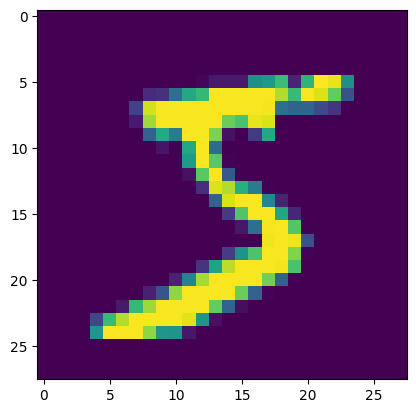

tensor(5)


In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [9]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [10]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [11]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [12]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
lenet5 = lenet5.to(device)

cuda:0


In [14]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [15]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.9770)
tensor(0.9826)
tensor(0.9849)
tensor(0.9890)
tensor(0.9874)
tensor(0.9851)
tensor(0.9880)
tensor(0.9887)
tensor(0.9874)
tensor(0.9870)
tensor(0.9875)
tensor(0.9901)
tensor(0.9871)
tensor(0.9890)
tensor(0.9893)
tensor(0.9885)
tensor(0.9888)
tensor(0.9898)
tensor(0.9891)
tensor(0.9888)
tensor(0.9876)
tensor(0.9885)
tensor(0.9885)
tensor(0.9873)
tensor(0.9894)
tensor(0.9905)
tensor(0.9852)
tensor(0.9885)
tensor(0.9874)
tensor(0.9872)
tensor(0.9896)
tensor(0.9879)
tensor(0.9866)
tensor(0.9870)


KeyboardInterrupt: 

In [16]:
lenet5.forward(X_test)

tensor([[ -2.7190,  -1.5404,   1.3586,  ...,  16.8109,  -1.7629,   1.9513],
        [  0.8225,  -0.8618,  22.0479,  ...,  -2.5721,   2.1660,  -6.7094],
        [ -5.6277,  19.2512,   0.4739,  ...,   1.5544,   1.6577,  -5.3151],
        ...,
        [ -6.9764,  -2.6173,  -3.5153,  ...,   1.6622,   0.4291,   4.7194],
        [ -0.2588,  -3.8203,  -7.2684,  ...,  -9.3133,   3.3942,  -1.6253],
        [  2.9970,  -3.6962,  -1.1406,  ..., -10.8028,  -0.5341,  -6.8561]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

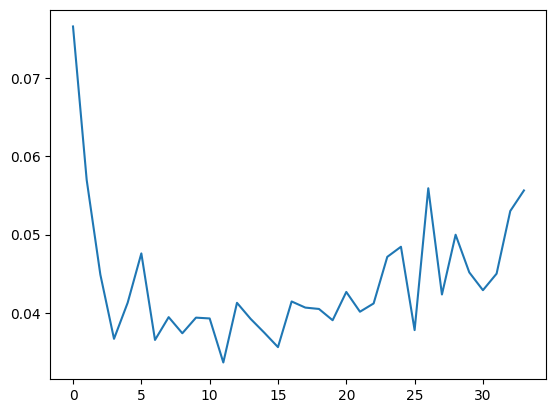

In [18]:
# plt.plot(test_accuracy_history);
plt.plot(test_loss_history);